# UAC20 Audio Class Device Topology Plotting - simplified

In [1]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', 'codes')))

path = os.sep.join(['..', '..', '..', '..', '..',  '..', '待處理', 'USB', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 

path = os.sep.join(['..', '..', '..', '..', '..',  '..', '待處理', 'ORM', 'bitbucket', 'github', 'codes'])
sys.path.append(path)

from usb_audio.orm import uac20, uac10

## Plot Topolograph

In [3]:
def profile_device(device, path): 
    
    file_name = '{}{} {}{}'.format(path, device.manufacturer_product, 'descriptors', '.json' )
    device.dump_descriptors(file_name = file_name)

    fig = plt.figure(figsize = (20, 10))
    title = '{} {}'.format(device.manufacturer_product,'UAC functional topolograph') 
    fig.suptitle(title, fontsize = 24)

    device.draw_topolograph(label_font_size = 24, edge_width = 5, edge_arrowstyle = '->', edge_arrowsize = 50,)

    plt.tight_layout()
    plt.savefig(path + title + '.png')
    plt.show()

In [4]:
# dev.reset()

[('0x1b3f', '0x2007')]


C:\Softwares\Python\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Softwares\Python\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


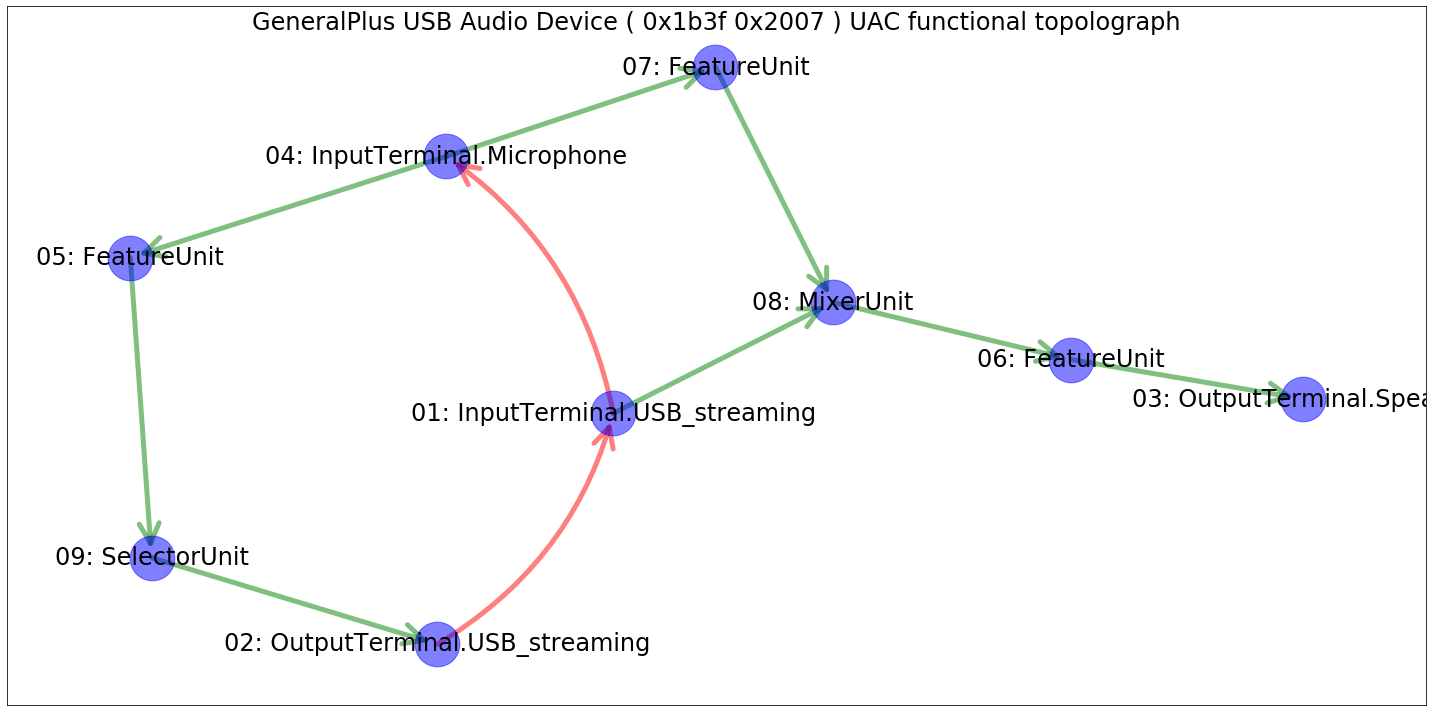

In [5]:
from universal_serial_bus import find_all_devices_by_class 

path = '.\\devices\\'

devices, devices_ids =  find_all_devices_by_class(0x01)
# [(hex(v), hex(p)) for (v, p) in devices_ids] 
print([(hex(v), hex(p)) for (v, p) in devices_ids])

for (idVendor, idProduct) in devices_ids:
    device = uac20.UACdevice(idVendor, idProduct)  
    profile_device(device, path)
    device.reset()